<a href="https://colab.research.google.com/github/roshaan7zafar/-MAX-Text-Sentiment-Classifier/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re


In [2]:
os.getcwd()

'/content'

In [3]:
file = pd.read_excel('/content/final_sentiments.xlsx')

In [13]:
file.head()

,Unnamed: 0,Text,sentiments
0,0,@its_F0ZIA @telenorpakistan ان کو کوئی پوچھنے ...,0
1,1,@drtu01 @786SAW_ @telenorpakistan نئیں یار \nم...,0
2,2,@Shahzad47284965 @telenorpakistan Wo keh rhy j...,0
3,3,@786SAW_ @imransh34 @telenorpakistan گل ھاسے و...,0
4,4,@imransh34 @telenorpakistan https://t.co/nwLxE...,0


In [5]:
file.sentiments.value_counts()

2    42057
0    41222
1    24990
3     2742
Name: sentiments, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


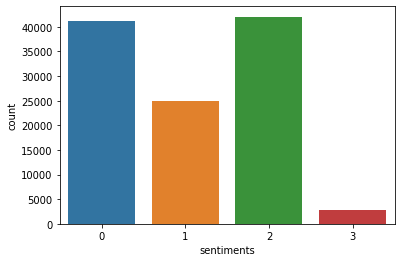

In [9]:
sns.countplot(file['sentiments'])

In [ ]:
MAX_NB_WORDS = 50000
MAX_SEQ_LEN = 100
EMBEDDING_DIM = 